# Proyecto 1
## Ciencias de Datos en Python

*20240302*

**Diego Morales**

- [Importación](#Importacion)
- [Conjuntos de Datos](#Conjuntos-de-Datos)
- [Análisis Exploratorio](#Analisis-Exploratorio)
- [Histogramas](#Histogramas)
- [Variables Independientes](#Variables-Independientes)

## Importacion

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

sns.set_style("whitegrid")
warnings.filterwarnings('ignore')

dataset = np.load('proyecto_training_data.npy')
dataset.shape

(1460, 6)

## Conjuntos de Datos

In [3]:
def split_dataset(dataset, per_train_set=0.8):
    n = int(len(dataset)*per_train_set)
    train_set = dataset[:n]
    test_set = dataset[n:]
    return train_set, test_set

train_set, test_set = split_dataset(dataset)

## Analisis Exploratorio

In [4]:
df = pd.DataFrame(dataset, columns=['SalePrice', 'OverallQual', '1stFlrSF', 'TotRmsAbvGrd', 'YearBuilt', 'LotFrontage'])
df.describe()

,SalePrice,OverallQual,1stFlrSF,TotRmsAbvGrd,YearBuilt,LotFrontage
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1201.000000
mean,180921.195890,6.099315,1162.626712,6.517808,1971.267808,70.049958
std,79442.502883,1.382997,386.587738,1.625393,30.202904,24.284752
min,34900.000000,1.000000,334.000000,2.000000,1872.000000,21.000000
25%,129975.000000,5.000000,882.000000,5.000000,1954.000000,59.000000
50%,163000.000000,6.000000,1087.000000,6.000000,1973.000000,69.000000
75%,214000.000000,7.000000,1391.250000,7.000000,2000.000000,80.000000
max,755000.000000,10.000000,4692.000000,14.000000,2010.000000,313.000000


## Histogramas

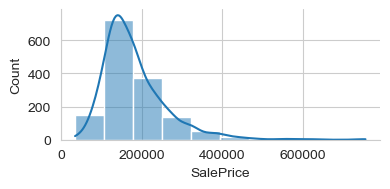

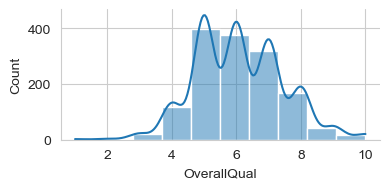

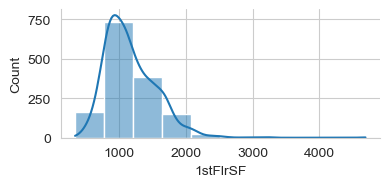

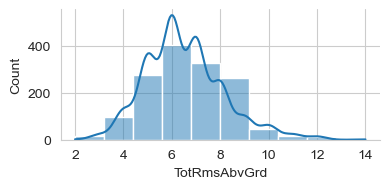

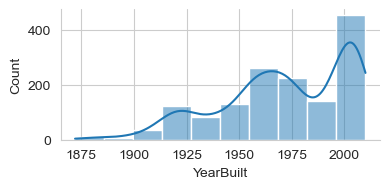

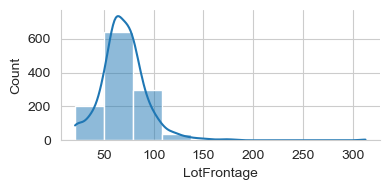

In [5]:
columns = df.columns

for column in columns:
    sns.displot(data=df, x=column, kind='hist', kde=True, bins=10, height=2, aspect=2)

## Variables Independientes

Se seleccionan las variables con mayor coeficiente de correlación:
- OverallQual
- 1stFlrSF

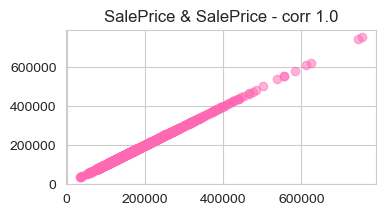

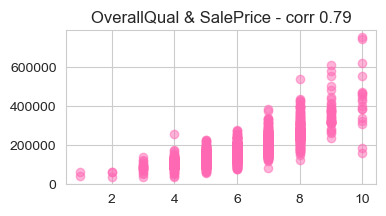

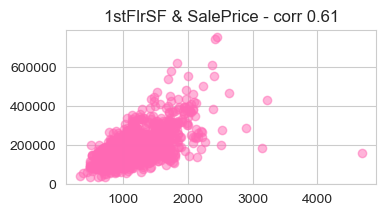

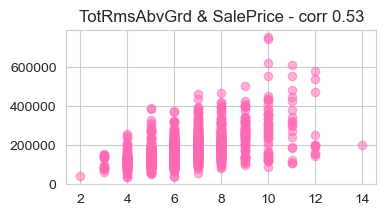

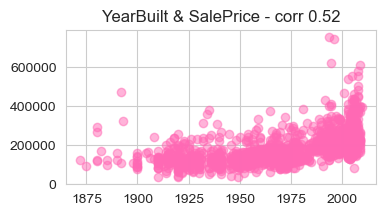

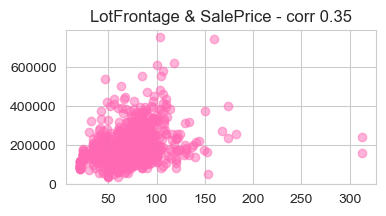

In [30]:
for column, corr in df.corr().iloc[0].items():
    plt.figure(figsize=(4,2))
    plt.scatter(x=df[column], y=df['SalePrice'], color='hotpink', alpha=0.5)
    plt.title(f'{column} & SalePrice - corr {round(corr, 2)}')
    plt.show()
    

## Modelo de Regresión Lineal

 $$y = β0 + β1 ∗ x$$

In [107]:
def model_reg_lin(x, y, epochs, imprimir_error_cada, learning_rate):
    '''Modelo de Regresión Lineal'''
    x = np.array([x, np.ones(shape=x.shape)]).transpose()
    b = np.random.rand(2, 1)
    results = []
    for epoch in range(1, epochs+1):
        y_pred = np.dot(x, b)
        loss = (1/(2*len(y)))*np.power(np.sum(y - y_pred), 2)
        result = {'epoch': epoch,
                  'loss': loss}
        if epoch%imprimir_error_cada==0:
            print(result)
        results.append(result)

y = dataset[:, 0] #SalePrice
x = dataset[:, 1] #OverallQual

model_reg_lin(x, y, 3, 1, 0.01)

{'epoch': 1, 'loss': 5.093072432764358e+19}
{'epoch': 2, 'loss': 5.093072432764358e+19}
{'epoch': 3, 'loss': 5.093072432764358e+19}


array([1., 1., 1., ..., 1., 1., 1.])